In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('MTA_130803_Pivotdown.txt')

## Let's take a look

In [146]:
data.tail(100)

,C_A,UNIT,SCP,date,time,desc,entries,exits
2013-07-31 09:00:00,TRAM,R469,00-03-01,07/31/2013,9:00:00,REGULAR,2357724,366217
2013-07-31 13:00:00,TRAM,R469,00-03-01,07/31/2013,13:00:00,REGULAR,2357814,366218
2013-07-31 17:00:00,TRAM,R469,00-03-01,07/31/2013,17:00:00,REGULAR,2357902,366220
2013-07-31 21:00:00,TRAM,R469,00-03-01,07/31/2013,21:00:00,REGULAR,2357969,366221
2013-08-01 01:00:00,TRAM,R469,00-03-01,08/01/2013,1:00:00,REGULAR,2358007,366221
2013-08-01 05:00:00,TRAM,R469,00-03-01,08/01/2013,5:00:00,REGULAR,2358008,366221
2013-08-01 09:00:00,TRAM,R469,00-03-01,08/01/2013,9:00:00,REGULAR,2358044,366223
2013-08-01 13:00:00,TRAM,R469,00-03-01,08/01/2013,13:00:00,REGULAR,2358087,366223
2013-08-01 17:00:00,TRAM,R469,00-03-01,08/01/2013,17:00:00,REGULAR,2358128,366224
2013-08-01 21:00:00,TRAM,R469,00-03-01,08/01/2013,21:00:00,REGULAR,2358165,366228


## Convert to datetime and use that as the index

In [5]:
def convert_to_datetime(row):
    return pd.to_datetime(row['date']+" "+row['time'], format="%m/%d/%Y %H:%M:%S")

In [6]:
data.index= data.apply(convert_to_datetime, axis=1)

In [161]:
list(aug_1['a_key'])[np.random.randint(len(aug_1))]

'N044R18700-00-00'

## What range of days (and time) do we have?

In [8]:
data.index.min(), data.index.max()

(Timestamp('2013-07-27 00:00:00'), Timestamp('2013-08-02 23:59:27'))

## Looking at one day: Aug 1st

In [150]:
aug_1= data['2013-08-01'].copy()

In [151]:
def return_key(x):
    return x[0] + x[1] + x[2]

aug_1['a_key'] = aug_1[['C_A','UNIT','SCP']].apply(return_key, axis = 1)

In [152]:
aug_1.head(20)

,C_A,UNIT,SCP,date,time,desc,entries,exits,a_key
2013-08-01 00:00:00,A002,R051,02-00-00,08/01/2013,0:00:00,REGULAR,4215894,1445274,A002R05102-00-00
2013-08-01 04:00:00,A002,R051,02-00-00,08/01/2013,4:00:00,REGULAR,4215928,1445278,A002R05102-00-00
2013-08-01 08:00:00,A002,R051,02-00-00,08/01/2013,8:00:00,REGULAR,4215977,1445362,A002R05102-00-00
2013-08-01 12:00:00,A002,R051,02-00-00,08/01/2013,12:00:00,REGULAR,4216157,1445610,A002R05102-00-00
2013-08-01 16:00:00,A002,R051,02-00-00,08/01/2013,16:00:00,REGULAR,4216460,1445682,A002R05102-00-00
2013-08-01 20:00:00,A002,R051,02-00-00,08/01/2013,20:00:00,REGULAR,4217269,1445750,A002R05102-00-00
2013-08-01 00:00:00,A002,R051,02-00-01,08/01/2013,0:00:00,REGULAR,3982836,865549,A002R05102-00-01
2013-08-01 04:00:00,A002,R051,02-00-01,08/01/2013,4:00:00,REGULAR,3982869,865551,A002R05102-00-01
2013-08-01 08:00:00,A002,R051,02-00-01,08/01/2013,8:00:00,REGULAR,3982895,865599,A002R05102-00-01
2013-08-01 12:00:00,A002,R051,02-00-01,08/01/2013,12:00:00,REGULAR,3983056,865702,A002R05102-00-01


In [72]:
# Assumes argument is a pandas series object
def outlier_iqr(lst_of_values):
    q1,q3 = lst_of_values.quantile(.25), lst_of_values.quantile(.75)
    
    median = lst_of_values.quantile(.5)
    
    iqr = q3 - q1
    outlier_lim  = (1.5 * iqr)
    
    return (q1 - outlier_lim), (q3 + outlier_lim), median

In [64]:
iqr_lims = {}

iqr may not be suitable in catching very small values as it suggests negative values sometimes

In [66]:
from tqdm import tqdm_notebook as tqdm

In [68]:
for key in tqdm(aug_1['a_key'].unique()):
    mask = (aug_1['a_key']== key)
    
    lower, upper, median  = outlier_iqr(aug_1[mask]['entries'])
    
    iqr_lims[key]= [lower,upper]

In [71]:
iqr_lims['N504R02102-00-04']

[-7727774.0, 12887738.0]

In [76]:
df = aug_1.groupby(['C_A','UNIT','SCP','a_key'])[['entries','exits']].min().reset_index()
df[df['a_key'] == 'N504R02102-00-04']

,C_A,UNIT,SCP,a_key,entries,exits
2143,N504,R021,02-00-04,N504R02102-00-04,1795,1


In [92]:
aug_1[aug_1['a_key'] == 'N504R02102-00-04'].entries.median()

5156812.0

In [96]:
outlier_iqr(aug_1[aug_1['a_key'] == 'N504R02102-00-04'].entries)

(-7727774.0, 12887738.0, 5156812.0)

In [103]:
aug_1[aug_1['a_key'] == 'N504R02102-00-04'].entries

2013-08-01 00:00:00    5156751
2013-08-01 04:00:00    5156785
2013-08-01 08:00:00    5156812
2013-08-01 10:41:44    5156921
2013-08-01 10:42:17    5156921
2013-08-01 10:44:17    5156921
2013-08-01 10:44:38    5156921
2013-08-01 10:44:46    5156921
2013-08-01 10:55:24    5156922
2013-08-01 11:42:51    5156974
2013-08-01 11:52:20       1795
2013-08-01 11:52:27       1795
2013-08-01 12:00:00       1801
2013-08-01 16:00:00       2325
2013-08-01 20:00:00       3761
Name: entries, dtype: int64

In [261]:
aug_1[aug_1['a_key'] == 'PTH0R54300-04-00'].exits - aug_1[aug_1['a_key'] == 'PTH0R54300-04-00'].exits.shift(1)

2013-08-01 02:27:31       NaN
2013-08-01 06:39:31       0.0
2013-08-01 09:21:42   -4389.0
2013-08-01 10:29:50       1.0
2013-08-01 10:51:31    4396.0
2013-08-01 15:03:31       6.0
2013-08-01 19:15:31      11.0
2013-08-01 23:27:31       4.0
Name: exits, dtype: float64

In [254]:
vals = aug_1[aug_1['a_key'] == 'R240R04700-00-0'].entries - aug_1[aug_1['a_key'] == 'R240R04700-00-01'].entries.shift(1)

In [255]:
vals[vals > 0]

2013-08-01 05:00:00      68.0
2013-08-01 09:00:00     472.0
2013-08-01 09:36:19      70.0
2013-08-01 13:00:00     641.0
2013-08-01 17:00:00    1537.0
2013-08-01 21:00:00    2513.0
Name: entries, dtype: float64

In [166]:
aug_1.head()

,C_A,UNIT,SCP,date,time,desc,entries,exits,a_key
2013-08-01 00:00:00,A002,R051,02-00-00,08/01/2013,0:00:00,REGULAR,4215894,1445274,A002R05102-00-00
2013-08-01 04:00:00,A002,R051,02-00-00,08/01/2013,4:00:00,REGULAR,4215928,1445278,A002R05102-00-00
2013-08-01 08:00:00,A002,R051,02-00-00,08/01/2013,8:00:00,REGULAR,4215977,1445362,A002R05102-00-00
2013-08-01 12:00:00,A002,R051,02-00-00,08/01/2013,12:00:00,REGULAR,4216157,1445610,A002R05102-00-00
2013-08-01 16:00:00,A002,R051,02-00-00,08/01/2013,16:00:00,REGULAR,4216460,1445682,A002R05102-00-00


In [206]:
import os

In [217]:
my_key = 'N044R18700-00-00'
observations = aug_1[aug_1['a_key'] == my_key].copy()
observations['val_entries'] = observations.entries - observations.entries.shift(1)

observations['val_exits'] = observations.exits - observations.exits.shift(1)

mask = (observations['val_entries'] > 0) & (observations['val_exits'])
observations = observations[mask]
observations.drop(['entries','exits','date','time'], inplace = True, axis = 1)

if not os.path.isfile('aug_1.csv'):
    observations.to_csv('aug_1.csv',index_label='timestamp')
else:
    observations.to_csv('aug_1.csv',mode = 'a', index_label='timestamp', header=None)

In [286]:
for key in tqdm(aug_1['a_key'].unique()):
    
    observations = aug_1[aug_1['a_key'] == key].copy()
    
    observations['val_entries'] = observations.entries - observations.entries.shift(1)

    observations['val_exits'] = observations.exits - observations.exits.shift(1)

    mask = (observations['val_entries'] > 0) & (observations['val_exits'] > 0) & \
            (observations['val_entries'] < 4000) & (observations['val_exits'] < 4000)
    
    observations = observations[mask]
    observations.drop(['entries','exits','date','time'], inplace = True, axis = 1)

    if not os.path.isfile('aug_1.csv'):
        observations.to_csv('aug_1.csv',index_label='timestamp')
    else:
        observations.to_csv('aug_1.csv',mode = 'a', index_label='timestamp', header=None)

In [287]:
obs = pd.read_csv('aug_1.csv')

In [288]:
obs.index = pd.to_datetime(obs.timestamp)

In [289]:
obs.timestamp = pd.to_datetime(obs.timestamp)

In [290]:
obs.head()

,timestamp,C_A,UNIT,SCP,desc,a_key,val_entries,val_exits
timestamp,,,,,,,,
2013-08-01 04:00:00,2013-08-01 04:00:00,A002,R051,02-00-00,REGULAR,A002R05102-00-00,34.0,4.0
2013-08-01 08:00:00,2013-08-01 08:00:00,A002,R051,02-00-00,REGULAR,A002R05102-00-00,49.0,84.0
2013-08-01 12:00:00,2013-08-01 12:00:00,A002,R051,02-00-00,REGULAR,A002R05102-00-00,180.0,248.0
2013-08-01 16:00:00,2013-08-01 16:00:00,A002,R051,02-00-00,REGULAR,A002R05102-00-00,303.0,72.0
2013-08-01 20:00:00,2013-08-01 20:00:00,A002,R051,02-00-00,REGULAR,A002R05102-00-00,809.0,68.0


In [291]:
outlier_iqr(obs.val_entries)

(-415.5, 788.5, 142.0)

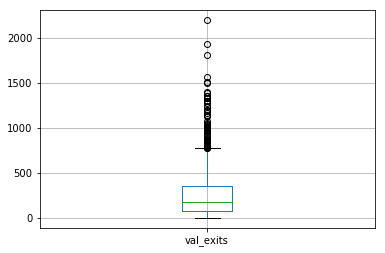

In [293]:
obs[obs.val_entries > 788].boxplot('val_exits')

In [295]:
obs[obs.val_exits > 2000]

,timestamp,C_A,UNIT,SCP,desc,a_key,val_entries,val_exits
timestamp,,,,,,,,
2013-08-01 12:00:00,2013-08-01 12:00:00,A025,R023,01-06-00,REGULAR,A025R02301-06-00,131.0,2861.0
2013-08-01 20:00:00,2013-08-01 20:00:00,H009,R235,00-00-00,REGULAR,H009R23500-00-00,627.0,2363.0
2013-08-01 20:00:00,2013-08-01 20:00:00,N062,R011,01-00-00,REGULAR,N062R01101-00-00,267.0,2353.0
2013-08-01 16:00:00,2013-08-01 16:00:00,N063,R011,00-00-00,REGULAR,N063R01100-00-00,232.0,2023.0
2013-08-01 20:00:00,2013-08-01 20:00:00,N063,R011,00-00-00,REGULAR,N063R01100-00-00,95.0,3951.0
2013-08-01 20:00:00,2013-08-01 20:00:00,N063,R011,00-00-01,REGULAR,N063R01100-00-01,155.0,3721.0
2013-08-01 20:00:00,2013-08-01 20:00:00,N063,R011,00-00-02,REGULAR,N063R01100-00-02,433.0,2614.0
2013-08-01 20:00:00,2013-08-01 20:00:00,N073,R013,02-00-01,REGULAR,N073R01302-00-01,82.0,2279.0
2013-08-01 21:00:00,2013-08-01 21:00:00,N083,R138,01-00-00,REGULAR,N083R13801-00-00,645.0,2876.0


In [297]:
stations = pd.read_excel('Remote-Booth-Station.xls')

In [298]:
for col in stations.columns:
    if stations[col].dtype == np.dtype('O'):
        stations[col] = stations[col].apply(lambda x: str(x).strip())

In [322]:
data = pd.merge(stations, obs,how='right',left_on=['Booth','Remote'],
         right_on=['C_A','UNIT'], indicator = True)

In [323]:
len(aug_1)

32116

In [324]:
len(obs), len(data)

(20827, 20827)

In [325]:
mask = (data['_merge'] != 'both')

In [326]:
data_mask = data[mask].copy() 

In [327]:
def concat_strings(x):
    return x[0] +' '+ x[1]

data_mask['key'] = data_mask[['C_A','UNIT']].apply(concat_strings,axis =1)

In [328]:
print(len(data_mask['key'].unique())) # 51 C_A, UNIT combinations cannot be located in the Remote Booth spreadsheet

51


In [329]:
data.head()

,Remote,Booth,Station,Line Name,Division,timestamp,C_A,UNIT,SCP,desc,a_key,val_entries,val_exits,_merge
0,R001,A060,WHITEHALL ST,R1,BMT,2013-08-01 09:00:00,A060,R001,00-00-00,REGULAR,A060R00100-00-00,546.0,379.0,both
1,R001,A060,WHITEHALL ST,R1,BMT,2013-08-01 13:00:00,A060,R001,00-00-00,REGULAR,A060R00100-00-00,361.0,539.0,both
2,R001,A060,WHITEHALL ST,R1,BMT,2013-08-01 17:00:00,A060,R001,00-00-00,REGULAR,A060R00100-00-00,452.0,833.0,both
3,R001,A060,WHITEHALL ST,R1,BMT,2013-08-01 21:00:00,A060,R001,00-00-00,REGULAR,A060R00100-00-00,253.0,1063.0,both
4,R001,A060,WHITEHALL ST,R1,BMT,2013-08-01 09:00:00,A060,R001,00-00-01,REGULAR,A060R00100-00-01,466.0,194.0,both


In [331]:
data.to_csv('aug_1_after_merge_and_etl_v1.csv', index=False)